# Relatório de análise 7

## Criando agrupamentos

In [0]:
import pandas as pd

In [49]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [50]:
dados['Valor'].mean()

5046.172821405663

In [51]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
14,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
15,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
16,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,16.09,Casa
18,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento
19,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento


In [52]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [0]:
grupo_bairro = dados.groupby('Bairro')

In [54]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [55]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [56]:
for bairro, data in grupo_bairro:
  print(type(data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [57]:
for bairro, data in grupo_bairro:
  print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [58]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas descritivas

In [59]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [60]:
grupo_bairro.aggregate(['min', 'max', 'sum'])

Tipo  ...                                      Tipo Agregado
                         min  ...                                                sum
Bairro                        ...                                                   
Barra da Tijuca  Apartamento  ...  CasaApartamentoCasaApartamentoApartamentoApart...
Botafogo         Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Copacabana       Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Flamengo         Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Ipanema          Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Leblon           Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Tijuca           Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...

[7 rows x 30 columns]

In [61]:
grupo_bairro.aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo',
                                                                'sum': 'Soma'})


Tipo  ...                                      Tipo Agregado
                      Mínimo  ...                                               Soma
Bairro                        ...                                                   
Barra da Tijuca  Apartamento  ...  CasaApartamentoCasaApartamentoApartamentoApart...
Botafogo         Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Copacabana       Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Flamengo         Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Ipanema          Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Leblon           Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...
Tijuca           Apartamento  ...  ApartamentoApartamentoApartamentoApartamentoAp...

[7 rows x 30 columns]

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

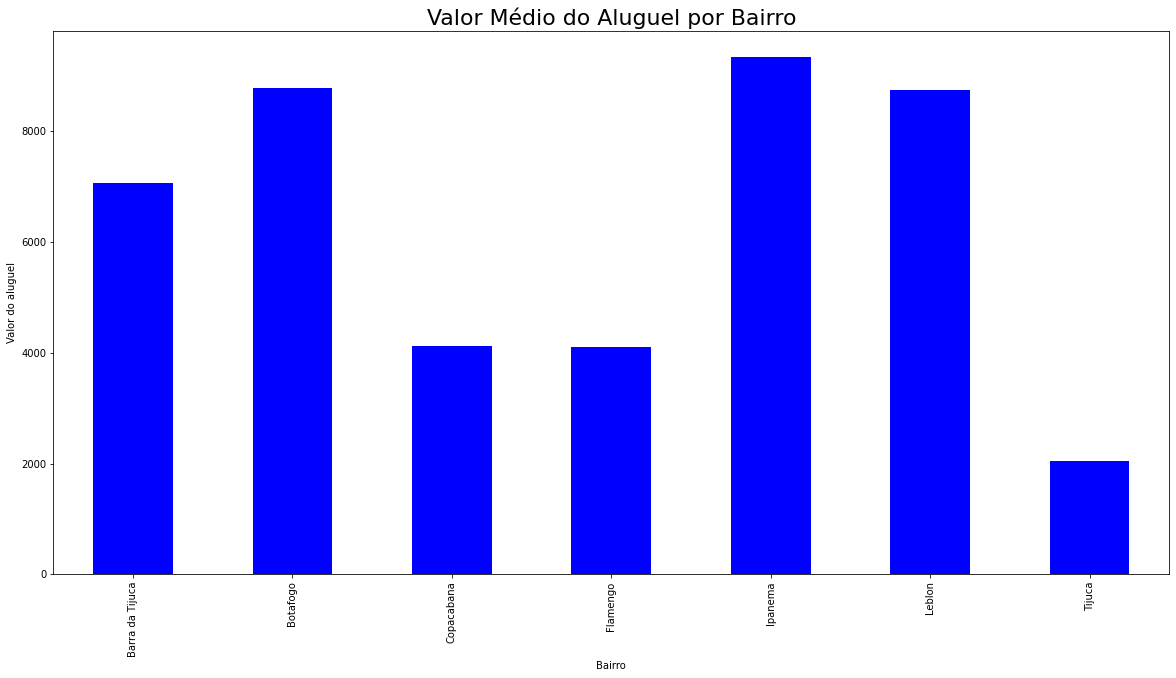

In [63]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel("Valor do aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro", {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

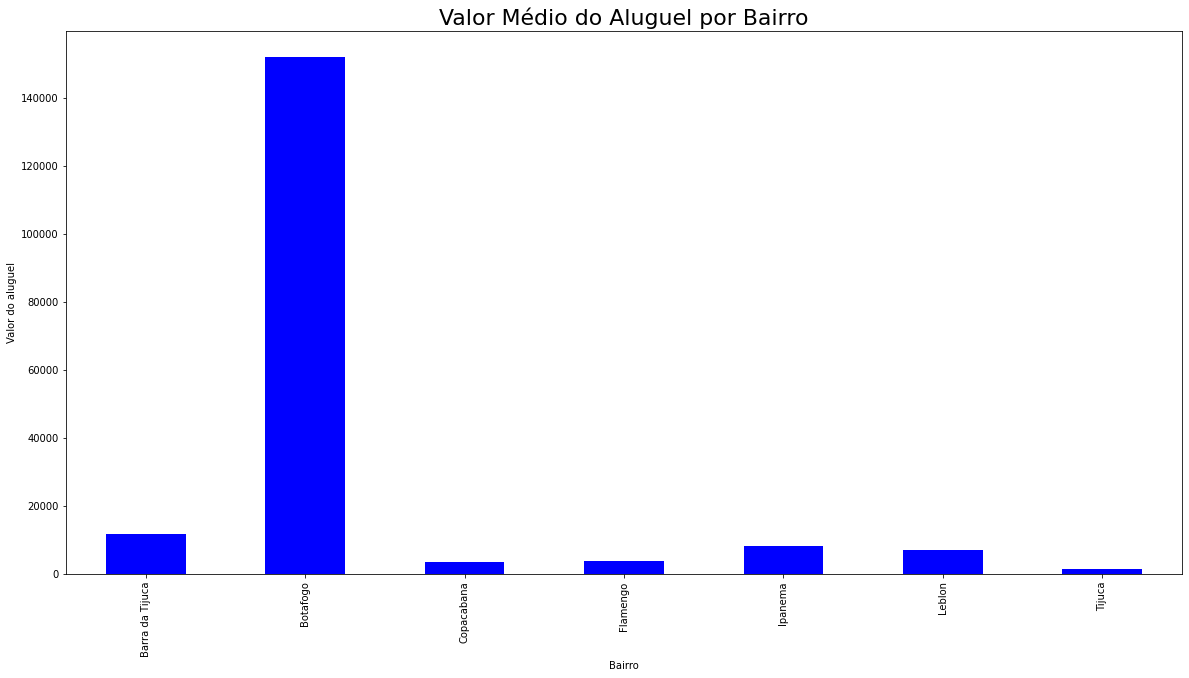

In [64]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel("Valor do aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro", {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

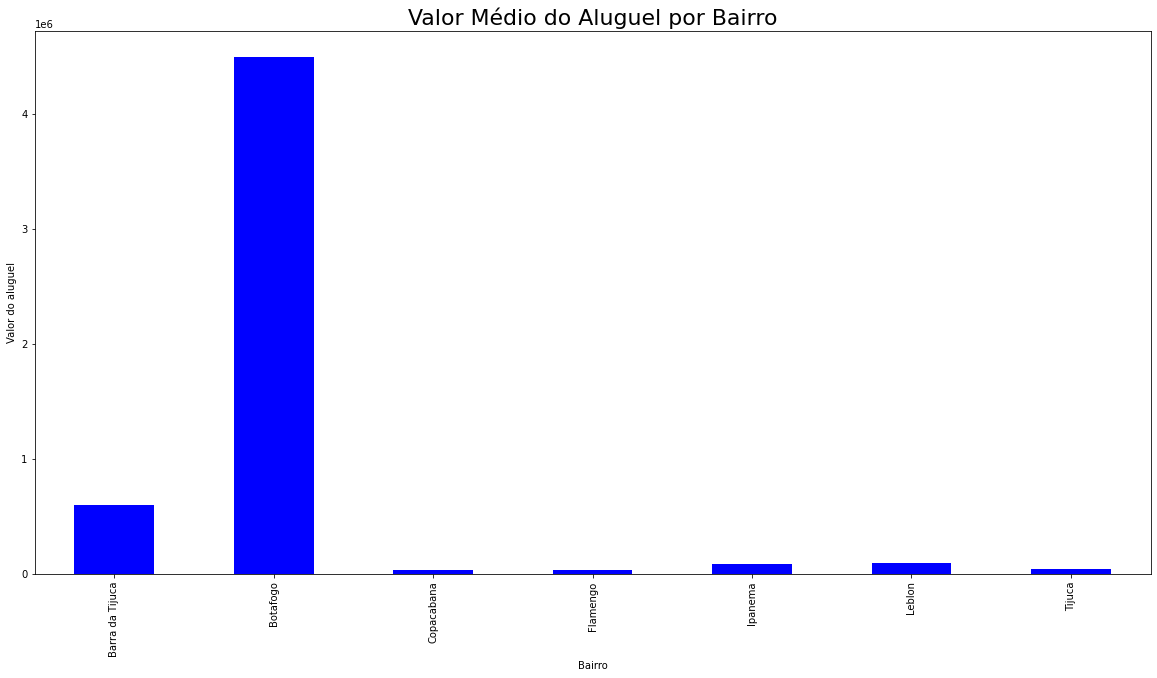

In [65]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel("Valor do aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro", {'fontsize': 22})